### Social Network Analysis

Βιβλιοθήκες που χρησιμοποιήθηκαν:
* <a href="https://pandas.pydata.org/" target="_blank">pandas</a>
* <a href="https://networkx.org/" target="_blank">networkx</a>
* <a href="https://matplotlib.org/" target="_blank">matplotlib</a>
* <a href="https://docs.python.org/3/library/time.html" target="_blank">time</a>

In [1]:
# εισαγωγή βιβλιοθηκών
import pandas as pd 
import networkx as nx
import time
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

Το αρχείο txt μπορείτε να το βρείτε στον σύνδεσμο:
<a href="https://snap.stanford.edu/data/sx-stackoverflow.html" target="_blank">https://snap.stanford.edu/data/sx-stackoverflow.html</a>

In [2]:
# διαβάζουμε το αρχείο και αναθέτουμε κατάλληλους τίτλους, το κάνουμε seperate με το κενό
# επειδή ξέρουμε ότι οι τιμές στο txt χωρίζονται με το κενό
df = pd.read_csv("sx-stackoverflow-c2a.txt", sep= " ", 
                header=None, 
                names = ["source_id", "target_id", "timestamp"])

#ταξινομούμε σε αύξουσα σειρά το dataframe με βάση τη χρονική περίοδο
df.sort_values(by="timestamp")
# εμφανίζουμε τα πρώτα 5 στοιχεία του dataframe
df.head()

,source_id,target_id,timestamp
0,1,91,1220713630
1,3,91,1220713792
2,380,350,1220715736
3,4642,2257,1220734307
4,4642,1324220,1220735746


1. Υπολογισμός των χρονικών στιγμών 𝑡𝑚𝑖𝑛 και 𝑡𝑚𝑎𝑥.

In [3]:
# βρίσκουμε το min και το max του time
min_time = df['timestamp'].min()
max_time = df['timestamp'].max()

In [4]:
# εκτυπώνουμε τις χρονικές στιγμές για να δούμε το διάστημα 
# των χρονικών στιγμ΄΄ών
print(time.localtime(min_time))
print("=========================")
print(time.localtime(max_time))

time.struct_time(tm_year=2008, tm_mon=8, tm_mday=2, tm_hour=5, tm_min=52, tm_sec=9, tm_wday=5, tm_yday=215, tm_isdst=1)
time.struct_time(tm_year=2016, tm_mon=3, tm_mday=6, tm_hour=16, tm_min=10, tm_sec=20, tm_wday=6, tm_yday=66, tm_isdst=0)


2. Διαμέριση του συνολικού χρονικού διαστήματος 𝑇 = [𝑡𝑚𝑖𝑛,𝑡𝑚𝑎𝑥] στα υποδιαστήματα 
{𝑇1, 𝑇2, ⋯ , 𝑇𝑗
, … , 𝑇𝑁} και υπολογισμός των αντίστοιχων χρονικών στιγμών 
{𝑡0,𝑡1,𝑡2, ⋯ ,𝑡𝑗−1,𝑡𝑗 … ,𝑡𝑁−1,𝑡𝑁} συναρτήσει της παραμέτρου (𝑁). Η παράμετρος (𝑁) θα 
μπορεί να μεταβληθεί από τον χρήστη του προγράμματος πριν από την εκτέλεσή του.

In [5]:
# υπολογίζουμε το ΔΤ
DT = max_time - min_time
# θέτουμε ένα N
N = 91 # το 91 ειναι για τους μηνες , int(input("Give me the N: "))
# υπολογίζουμε το δt
dt = DT / N 
# αρχικοποιούμε τη λίστα με τις χρονικές στιγμές
t = []
for j in range(0, N + 1):
    # εισάγουμε τις χρονικές στιγμές στη λίστα
    t.append(min_time + j * dt)
# παίρνουμε το column timestamp από το dataframe 
# και το εισάγουμε σε μια λίστα
times = df['timestamp'].tolist()
# το ταξινομούμε σε αυξουσα σειρά
times.sort()

3. Προγραμματιστική αποτύπωση (είτε μέσω της μήτρας γειτνίασης είτε μέσω κάποιου 
εγγενούς για το εργαλείο που θα χρησιμοποιήσετε τρόπου, π.χ. ενός αντικειμένου Graph
του module NetworkX της Python) του συνόλου των υποδικτύων 𝐺[𝑡𝑗−1,𝑡𝑗
] για 1 ≤ 𝑗 ≤
𝑁.

In [6]:
# μεταβλητή που θα αποθηκεύει το τελευταίο position
# της χρονικής στιγμής που ελέγχθηκε
index = 0
# θα δημιουργήσουμε 2 λίστες γραφημάτων
# στη λίστα di_graphs θα έχουμε τα κατευθυν΄ομενα γραφήματα
di_graphs = []
# στη λίστα graphs θα έχουμε τα αντίστοιχα μη κατευθυνόμενα γραφήματα
graphs = []
for i in range(1, N + 1):
    Gd = nx.DiGraph()
    G = nx.Graph()
    E = []
    V = []
    # για κάθε χρονικ΄ή στιγμή
    for pos, value in enumerate(times): 
        # από τη στιγμή που η λίστα times είναι σε αύξουσα σειρά
        # μπορώ κάθε φορά να μην ελέγχω παλαιότερες χρονικές στιγμές 
        # διότι θα είναι περιττοί έλγχοι
        if pos + index > len(times) - 1:
            break    
        # αν η χρονικ΄ή στιγμή ανήκει στα επιθυμητά όρια
        if (1 <= i <= N-1) and (t[i-1] <= times[pos + index] < t[i]):
            # δημιουργούμε το τις κορυφές και τις συνδέσεις
            e1 = (df['source_id'][pos + index], df['target_id'][pos + index])
            if (e1 not in E):
                E.append(e1)
                
            if df['source_id'][pos + index] not in V:
                V.append(df['source_id'][pos + index])
            
            if df['target_id'][pos + index] not in V:
                V.append(df['target_id'][pos + index])
                
        # αν η χρονικ΄ή στιγμή ανήκει στα επιθυμητά όρια
        elif (i == N) and (t[i-1] <= times[pos + index] <= t[i]):
            # δημιουργούμε το τις κορυφές και τις συνδέσεις
            e1 = (df['source_id'][pos + index], df['target_id'][pos + index])
            if (e1 not in E):
                E.append(e1)
                
            if df['source_id'][pos + index] not in V:
                V.append(df['source_id'][pos + index])
            
            if df['target_id'][pos + index] not in V:
                V.append(df['target_id'][pos + index])
        # αν βρεθεί χρονική περίοδο που είναι μεγαλύτερη από αυτή που εξετάζουμε
        # τελειωνουμε το loop, και αποθηκεύουμε στη μεταβλητή index τη θέση της τελευταία
        # χρονική στιγμής που τελείωσε το loop
        elif times[pos + index] >= t[i]:
            index += pos
            break
    # δημιουργούμε τα γραφήματα
    Gd.add_nodes_from(V)
    Gd.add_edges_from(E)
    G.add_nodes_from(V)
    G.add_edges_from(E)
    # τα εισάγουμε στις αντίστοιχες λίστες
    di_graphs.append(Gd)
    graphs.append(G)
    # εκτυπώνουμε τις πληροφορίες
    print(f"__Graph {i} info__")
    print(f"# of edges: {len(E)}")
    print(f"# of nodes: {len(V)}\n")
    # λόγω χρόνου δημιουργούμε μόνο τα πρώτα 4 γραφήματα
    if len(graphs) == 4:
        break

__Graph 1 info__
# of edges: 156
# of nodes: 180

__Graph 2 info__
# of edges: 17705
# of nodes: 5547

__Graph 3 info__
# of edges: 24018
# of nodes: 6220

__Graph 4 info__
# of edges: 19459
# of nodes: 6111



4. Για κάθε ένα από τα υποδύκτια 𝐺[𝑡𝑗−1,𝑡𝑗
] για 1 ≤ 𝑗 ≤ 𝑁 να υπολογίσετε και να 
παρουσιάσετε γραφικά την κατανομή των τιμών των παρακάτω μέτρων κεντρικότητας:
i. Degree Centrality
ii. In-Degree Centrality
iii. Out-Degree Centrality
iv. Closeness Centrality
v. Betweenness Centrality
vi. Eigenvector Centrality
vii. Katz Centrality

In [7]:
# συνάρτηση που εκτυπωνει τα γραφήματα με τα μέτα κεντρικότητα με πιο ωραίο τρόπο
def draw(G, pos, measures, measure_name):
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

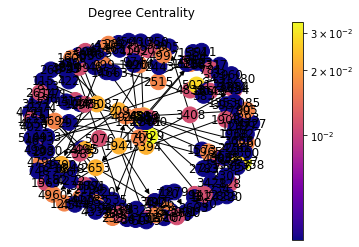

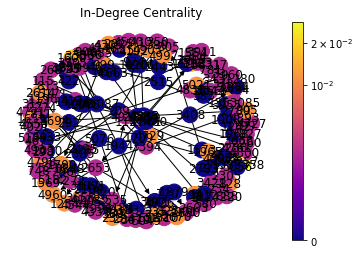

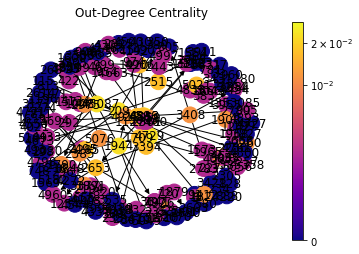

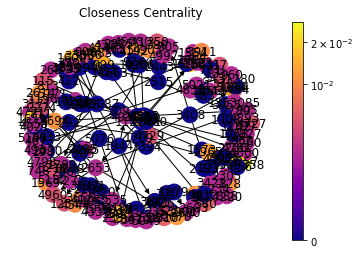

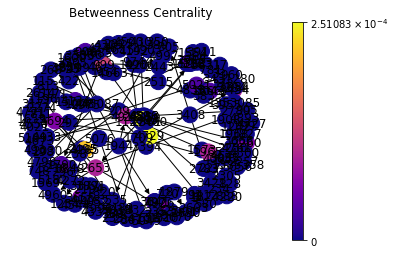

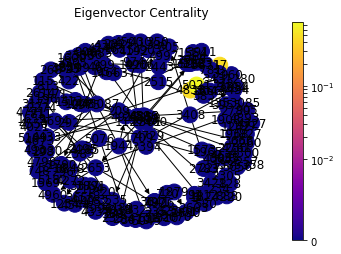

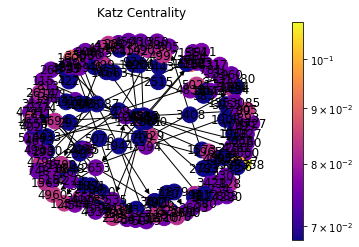

In [8]:
# εμφανίζουμε γραφικά τα μέτρα κεντρικότητα για το πρώτο γράφημα
G = di_graphs[0]
pos = nx.spring_layout(G, seed=200)
draw(G, pos, nx.degree_centrality(G), "Degree Centrality")
draw(G, pos, nx.in_degree_centrality(G), "In-Degree Centrality")
draw(G, pos, nx.out_degree_centrality(G), "Out-Degree Centrality")
draw(G, pos, nx.closeness_centrality(G), "Closeness Centrality")
draw(G, pos, nx.betweenness_centrality(G), "Betweenness Centrality")
draw(G, pos, nx.eigenvector_centrality(G), "Eigenvector Centrality")
draw(G, pos, nx.katz_centrality(G), "Katz Centrality")

5. Για κάθε ζεύγος διαδοχικών υποδικτύων (𝐺[𝑡𝑗−1,𝑡𝑗], 𝐺[𝑡𝑗,𝑡𝑗+1]) για 1 ≤ 𝑗 ≤ 𝑁 − 1 να 
 υπολογιστούν τα σύνολα 𝑉∗[𝑡𝑗−1,𝑡𝑗+1], 𝐸∗[𝑡𝑗−1,𝑡𝑗] και 𝐸∗[𝑡𝑗,𝑡𝑗+1].

In [9]:
v_set = []
for i in range(len(graphs) - 1):
    v = []
    for index, node in enumerate(graphs[i].nodes()):
        # για κάθε κορυφή του γράφου i ελέγχουμε αν η κορυφή βρίσκεται στον γράφο i + 1
        if node in graphs[i + 1].nodes():
            # αν ισχύει τότε κρατάμε την κορυφή
            v.append(node)
    # εισάγουμε τη λίστα με τις κορυφές στο σύνολο μας
    v_set.append(v)

In [10]:
len(v_set)

3

In [11]:
v_set[0][:5]

[1, 91, 3, 380, 350]

In [12]:
# αρχικοποιούμε τις λίστες
e_train = []
e_test = []


for i in range(len(v_set)):
    # το edges_prev είναι για την χρονική στιγμή [tj-1, tj]
    edges_prev = list(graphs[i].edges())
    # το edges_next είναι για την χρονική στιγμή [tj, tj+1]
    edges_next = list(graphs[i+1].edges())
    
    e_p = []
    for e in edges_prev:
        # εξετάζουμε αν κάθε κορυφή βρίσκεται στο σύνολο
        if e[0] in v_set[i] and e[1] in v_set[i]:
            e_p.append(e)
    
    e_n = []
    for e in edges_next:
        # εξετάζουμε αν κάθε κορυφή βρίσκεται στο σύνολο
        if e[0] in v_set[i] and e[1] in v_set[i]:
            e_n.append(e)
    
    e_train.append(e_p)
    e_test.append(e_n)
    
    print(f"{i + 1} ", end="")

1 2 3 

In [13]:
e_train[0][:5]

[(1, 91), (91, 3), (380, 350), (4642, 2257), (4642, 1324220)]

In [14]:
e_test[0][:5]

[(2975, 4309), (2975, 2975), (2975, 1659), (4309, 4309), (1965, 832)]

In [15]:
# αρχικοποιούμε τις λίστες με τα γραφήματα
graphs_test = []
graphs_train = []

for index, nodes in enumerate(v_set):
        # δημιουργία train γράφου
        g_train = nx.Graph()
        # εισάγουμε τις κορυφές
        g_train.add_nodes_from(nodes)
        # εισάγουμε τις ακμές της προηγούμενης χρονικής στιγμής
        g_train.add_edges_from(e_train[index])
        # το προσθλετουμε στη λ΄ίστα
        graphs_train.append(g_train)
        
        # δημιουργία test γράφου
        g_test = nx.Graph()
        # εισάγουμε τις κορυφές
        g_test.add_nodes_from(nodes)
        # εισάγουμε τις ακμές της επόμενης χρονικής στιγμής
        g_test.add_edges_from(e_test[index])
        # το προσθέτουμε στη λίστα
        graphs_test.append(g_test) # να αναφέρω το λάθος

6. Για κάθε ζεύγος κόμβων (𝑢, 𝑣) ∈ 𝑉∗[𝑡𝑗−1,𝑡𝑗+1] και κάθε σύνολο 𝑉∗[𝑡𝑗−1,𝑡𝑗+1] με 1 ≤ 𝑗 ≤ 𝑁 − 1 να υπολογιστούν οι παρακάτω πίνακες ομοιόητας: 
i. −𝐿𝑒𝑛𝑔𝑡ℎ 𝑜𝑓 𝑆ℎ𝑜𝑟𝑡𝑒𝑠𝑡 𝑃𝑎𝑡ℎ 𝐵𝑒𝑡𝑤𝑒𝑒𝑛 𝑢 𝑎𝑛𝑑 𝑣 [Graph Distance] 
ii. [Common Neighbors]  
iii.[Jaccard’s Coefficient] 
iv. [Adamic / Adar] 
v.  [Preferential Attachment] 

In [16]:
# Περίπου 9 λεπτά για να εκτελεστεί (στα 2 γραφηματα)...
preds_jacard_co = []
preds_adamic_adar = []
preds_pre_atta = []
i = 1
# για κάθε γράφημα στη λίστα των train, υπολογίζουμε τις ζητούμενες τιμές
for g in graphs_train:
    preds_jacard_co.append(sorted(nx.jaccard_coefficient(g)))
    preds_adamic_adar.append(sorted(nx.adamic_adar_index(g)))
    preds_pre_atta.append(sorted(nx.preferential_attachment(g)))
    print(f"{i} ", end="")
    i += 1

1 2 3 

In [17]:
preds_jacard_co[0][:5]

[(1, 3, 1.0), (1, 17, 0.0), (1, 33, 0.0), (1, 46, 0.0), (1, 115, 0.0)]

In [18]:
preds_adamic_adar[1][:5]

[(1, 3, 0),
 (1, 5, 0.3284587387530511),
 (1, 13, 0.4170323914242463),
 (1, 17, 0),
 (1, 20, 0)]

In [19]:
preds_pre_atta[2][:5]

[(1, 3, 18), (1, 5, 72), (1, 13, 1746), (1, 17, 234), (1, 20, 288)]

In [20]:
# https://mriduls-networkx.readthedocs.io/en/betweenness_subset/reference/generated/networkx.classes.function.common_neighbors.html
# περιπου 15-25 λεπτα για να ολοκληρωθει...
# υπολογίζουμε το πλήθος common_neighbors και το μήκος του shortest_path
common_neighbors = []
shortest_paths = []
k = 1
for g in graphs_train:
    cn = []
    sp = []
    nodes = list(g.nodes())
    for i in range(len(nodes)):
        # το i + 1 το έχουμε βάλει διότι υποθέτουμε πως το μήκος του shortest path απο το 0 --> 1
        # είναι ίσο με το μήκος του shortest path από το 1 --> 0 
        for j in range(i + 1, len(nodes) - 1):
            # το common_neighbors μας επιστρ΄έφει του κοινούς γείτονες, αλλά εμέις θέλουμε το πλήθος αυτών
            cnt = len(sorted(nx.common_neighbors(g, nodes[i], nodes[j])))
            cn.append((nodes[i], nodes[j], cnt))
            
            # αν ο γράφος έχει path 
            if nx.has_path(g, nodes[i], nodes[j]):
                # υπολογίζουμε το μήκους του path
                cnt = len(sorted(nx.shortest_path(g, nodes[i], nodes[j])))
                sp.append((nodes[i], nodes[j], cnt))
            # αν δεν έχει path , τότε το τρίτο στοιχείο του tuple θα είναι ίσο με -1
            elif nx.has_path(g, nodes[i], nodes[j]) == False:
                sp.append((nodes[i], nodes[j], -1))
    # εισάγουμε τα στοιχεία
    common_neighbors.append(cn)   
    shortest_paths.append(sp)
    print(f"{k} ", end="")
    k += 1

1 2 3 

In [21]:
common_neighbors[0][:5]

[(1, 91, 0), (1, 3, 1), (1, 380, 0), (1, 350, 0), (1, 4642, 0)]

In [22]:
shortest_paths[1][:5]

[(2975, 4309, 2),
 (2975, 2992, 5),
 (2975, 1679, 5),
 (2975, 1612, 5),
 (2975, 1965, 3)]

7. Για κάθε έναν από τους πίνακες ομοιότητας SGD, SCN, SJC, SAκαι SPA που υπολογίστηκαν 
στο προηούμενο ερώτημα, για κάθε ένα από τα σύνολα κόμβων 𝑉
∗
[𝑡𝑗−1,𝑡𝑗+1], να 
εξαχθούν οι κορυφαίες 𝑝𝐺𝐷%, 𝑝𝐶𝑁%,𝑝𝐽𝐶%,𝑝𝐴% και 𝑝𝑃𝐴% (μεγαλύτερες) τιμές 
ομοιόητητας και τα ζεύγη των κορυφών στις οποίες αντιστοιχούν. Το ποσοστό αυτών 
των ζευγαριών των κορυφών που ανήκουν πράγματι στο σύνολο 𝐸
∗
[𝑡𝑗
,𝑡𝑗+1] υποδηλώνει 
το ποσοστό επιτύχιας στην πρόγνωση μελλοντικών ακμών της κάθε μετρικής. Να 
υπολογιστούν τα ποσοστό ορθής πρόγνωσης για κάθε μέτρο ομοιόητητας για κάθε 
σύνολο 𝑉
∗
[𝑡𝑗−1,𝑡𝑗+1] (δηλαδή για κάθε ζεύγος διαδοχικών υποδικτύων). Οι τιμές των 
παραμέτρων 𝑝𝐺𝐷%, 𝑝𝐶𝑁%,𝑝𝐽𝐶%,𝑝𝐴% και 𝑝𝑃𝐴% θα δίνονται από τον χρήστη του 
προγράμματος πριν από την εκτέλεση του προγράμματος.


In [23]:
# επιστρέφει μια λίστα με τις τιμές χωρις τα αντίστοιχα nodes
def get_values(l):
    return [value[2] for value in l]

In [24]:
# απομονώνουμε τις τιμές
values_shortest = []
values_neighb = []
values_jacard = []
values_adamic = []
values_pre_atta = []
for i in range(len(graphs_train)):
    values_shortest.append(get_values(shortest_paths[i]))
    values_neighb.append(get_values(common_neighbors[i]))
    values_jacard.append(get_values(preds_jacard_co[i]))
    values_adamic.append(get_values(preds_adamic_adar[i]))
    values_pre_atta.append(get_values(preds_pre_atta[i]))
    print(f"{i + 1} ", end="")

1 2 3 

In [25]:
values_shortest[0][:5]

[2, 3, -1, -1, -1]

In [26]:
values_pre_atta[1][:5]

[65, 260, 1352, 156, 13]

In [27]:
# ταξινομούμε σε φθίνουσα σειρά, τις λίστες βάση των λιστών των values
sorted_preds_jacard_co = []
sorted_preds_adamic_adar = []
sorted_preds_pre_atta = []
sorted_shortest_paths = []
sorted_common_neighbors = []
for i in range(len(graphs_train)):
    sorted_preds_jacard_co += [[x for _,x in sorted(zip(values_jacard[i],preds_jacard_co[i]), reverse=True)]]
    sorted_preds_adamic_adar += [[x for _,x in sorted(zip(values_adamic[i],preds_adamic_adar[i]), reverse=True)]]
    sorted_preds_pre_atta += [[x for _,x in sorted(zip(values_pre_atta[i],preds_pre_atta[i]), reverse=True)]]
    # τις πιο σύντομες διαδρομές τις ταξινομούμε σε αυξουσα σειρά επειδή στην αρχή θέλουμε τις πιο γρήγορες διαδρομές
    sorted_shortest_paths += [[x for _,x in sorted(zip(values_shortest[i],shortest_paths[i]), reverse=False)]]
    sorted_common_neighbors += [[x for _,x in sorted(zip(values_neighb[i],common_neighbors[i]), reverse=True)]]
    print(f"{i + 1} ", end="")

1 2 3 

In [28]:
sorted_preds_jacard_co[1][:10]

[(3431280, 15520, 1.0),
 (2631856, 13846, 1.0),
 (451867, 2399475, 1.0),
 (451867, 22540, 1.0),
 (451867, 12636, 1.0),
 (407256, 15040, 1.0),
 (379419, 4377, 1.0),
 (352728, 2031, 1.0),
 (28952, 7007, 1.0),
 (23740, 7412, 1.0)]

In [29]:
# συνάρτηση που μας επιστρέφει ένα ποσοστό των μεγαλύτερων τιμών
def get_part_of_values(l, percentage):
    return l[:int(len(l) * percentage)]

In [30]:
# παίρνουμε τις τιμές
percentage = 1/100 # float(input("Give a percentage: "))

max_preds_jacard_co = []
max_preds_adamic_adar = []
max_preds_pre_atta = []
max_common_neighbors = []
for i in range(len(graphs_train)):
    max_preds_jacard_co += [get_part_of_values(sorted_preds_jacard_co[i], percentage)]
    max_preds_adamic_adar += [get_part_of_values(sorted_preds_adamic_adar[i], percentage)]
    max_preds_pre_atta += [get_part_of_values(sorted_preds_pre_atta[i], percentage)]
    max_common_neighbors += [get_part_of_values(sorted_common_neighbors[i], percentage)]
    print(f"{i + 1} ", end="")

1 2 3 

In [31]:
max_preds_jacard_co[0][:5]

[(1127460, 2361, 1.0),
 (4685, 954, 1.0),
 (4300, 430, 1.0),
 (3631, 3205, 1.0),
 (2603, 888, 1.0)]

In [32]:
# για τις καλύτερες τιμές του shortest_path, ΄
# πρέπει να πάρουμε τα nodes που το μήκος του path τους είναι το μικρότερο
# οπότε αυτά τα στοιχεία θα βρίσκονται στην αρχή της ταξινομημένης λίστας
# και όχι στην τέλος αφού αυτή η λίστα είναι ταξινωμημένη σε αύξουσα σειρά
# ΣΗΜΑΝΤΙΚΟ: πρέπει να απορριφθούν όλα τα -1 , δηλαδή όλα τα nodes που δεν έχουν path
max_shortest_paths = []
for i in range(len(graphs_train)):
    sp = []
    for value in sorted_shortest_paths[i]:
        # απορίπτουμε αυ΄τά που δεν έχουν path
        if value[2] == -1:
            continue
        else:
            sp.append((value[0], value[1], value[2]))
        # αν μαζευτεί το πληθος των τιμών τότε σταματάμε το loop
        if len(sp) >= len(sorted_shortest_paths[i]) * percentage:
            break
    max_shortest_paths.append(sp)
    print(f"{i + 1} ", end="")

1 2 3 

In [33]:
max_shortest_paths[2][:5]

[(1, 4960, 2), (1, 5114, 2), (1, 17211, 2), (1, 19302, 2), (1, 24806, 2)]

In [34]:
# επιστρέφει τα edges των λιστών, χωρίς τις αντίστοιχες τιμές
def get_edges(l):
    return [(values[0], values[1]) for values in l]

In [35]:
edges_preds_jacard_co = []
edges_preds_adamic_adar = []
edges_preds_pre_atta = []
edges_common_neighbors = []
edges_shortest_paths = []
for i in range(len(graphs_train)):
    edges_preds_jacard_co.append(get_edges(max_preds_jacard_co[i]))
    edges_preds_adamic_adar.append(get_edges(max_preds_adamic_adar[i]))
    edges_preds_pre_atta.append(get_edges(max_preds_pre_atta[i]))
    edges_common_neighbors.append(get_edges(max_common_neighbors[i]))
    edges_shortest_paths.append(get_edges(max_shortest_paths[i]))
    print(f"{i + 1} ", end="")

1 2 3 

In [36]:
edges_shortest_paths[1][:5]

[(1, 1175), (1, 2590), (1, 2977), (1, 4021), (1, 5109)]

In [37]:
len(edges_common_neighbors[0])

127

In [38]:
# σαν παράμετρους έχουμε τη θέση του γράφου τη λίστα με τα edges της πρόβλεψης
# μας επιστρέφει το ποσοστό επιτυχίας των προβλέψεων
def get_percentage_of_predictions(pos, l):
    cnt = 0
    test_edges = list(graphs_test[pos].edges())
    length = len(l)
    for edge in l:
        if edge in test_edges or (edge[1], edge[0]) in test_edges:
            cnt += 1
    return cnt / len(l) * 100

In [39]:
print("Graph Distance")
print("----------------------")
for i in range(len(graphs_test)):
    print(f"Graph {i}: {get_percentage_of_predictions(i, edges_shortest_paths[i])}")
print("----------------------")

Graph Distance
----------------------
Graph 0: 4.6875
Graph 1: 1.8847382605436471
Graph 2: 1.6133280653233242
----------------------


In [40]:
print("Common Neighbors")
print("----------------------")
for i in range(len(graphs_test)):
    print(f"Graph {i}: {get_percentage_of_predictions(i, edges_common_neighbors[i])}")
print("----------------------")

Common Neighbors
----------------------
Graph 0: 0.7874015748031495
Graph 1: 2.500535446562433
Graph 2: 2.9089771660932127
----------------------


In [41]:
print("Jaccard’s Coefficient")
print("----------------------")
for i in range(len(graphs_test)):
    print(f"Graph {i}: {get_percentage_of_predictions(i, edges_preds_jacard_co[i])}")
print("----------------------")

Jaccard’s Coefficient
----------------------
Graph 0: 0.7874015748031495
Graph 1: 0.6076854334226989
Graph 2: 0.38593481989708406
----------------------


In [42]:
print("Adamic / Adar")
print("----------------------")
for i in range(len(graphs_test)):
    print(f"Graph {i}: {get_percentage_of_predictions(i, edges_preds_adamic_adar[i])}")
print("----------------------")

Adamic / Adar
----------------------
Graph 0: 0.7874015748031495
Graph 1: 2.1090259159964253
Graph 2: 2.2842723314421427
----------------------


In [43]:
print("Preferential Attachment")
print("----------------------")
for i in range(len(graphs_test)):
    print(f"Graph {i}: {get_percentage_of_predictions(i, edges_preds_pre_atta[i])}")
print("----------------------")

Preferential Attachment
----------------------
Graph 0: 0.0
Graph 1: 2.961572832886506
Graph 2: 2.617429740071249
----------------------


Κατάταξη με βάση τις καλύτερες προγνώσεις
-----------------------------------
Για το γράφημα 0:
1. Graph Distance (4.68%)
2. Common Neighbors / Jaccard’s Coefficient Adamic / Adar (0.78%)
3. Preferential Attachment 0%

Για το γράφημα 1:
1. Preferential Attachment(2.96%)
2. Common Neighbors (2.50%)
3. Adamic / Adar (2.1%)
4. Graph Distance (1.88%)
5. Jaccard’s Coefficient (0.6%)

Για το γράφημα 2:
1. Common Neighbors (2.9%)
2. Preferential Attachment(2.61%)
3. Adamic / Adar (2.28%)
4. Graph Distance (1.61%)
5. Jaccard’s Coefficient (0.38%)